In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn. preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('Covid Dataset.csv')

In [3]:
df.head()

Breathing Problem Fever Dry Cough Sore throat Running Nose Asthma  \
0               Yes   Yes       Yes         Yes          Yes     No   
1               Yes   Yes       Yes         Yes           No    Yes   
2               Yes   Yes       Yes         Yes          Yes    Yes   
3               Yes   Yes       Yes          No           No    Yes   
4               Yes   Yes       Yes         Yes          Yes     No   

  Chronic Lung Disease Headache Heart Disease Diabetes  ... Fatigue   \
0                   No       No            No      Yes  ...      Yes   
1                  Yes      Yes            No       No  ...      Yes   
2                  Yes      Yes            No      Yes  ...      Yes   
3                   No       No           Yes      Yes  ...       No   
4                  Yes      Yes           Yes      Yes  ...       No   

  Gastrointestinal  Abroad travel Contact with COVID Patient  \
0               Yes            No                        Yes   
1                No            No                         No   
2               Yes           Yes                         No   
3                No           Yes                         No   
4               Yes            No                        Yes   

  Attended Large Gathering Visited Public Exposed Places  \
0                       No                           Yes   
1                      Yes                           Yes   
2                       No                            No   
3                      Yes                           Yes   
4                       No                           Yes   

  Family working in Public Exposed Places Wearing Masks  \
0                                     Yes            No   
1                                      No            No   
2                                      No            No   
3                                      No            No   
4                                      No            No   

  Sanitization from Market COVID-19  
0                       No      Yes  
1                       No      Yes  
2                       No      Yes  
3                       No      Yes  
4                       No      Yes  

[5 rows x 21 columns]

In [4]:
df.shape

(5434, 21)

In [5]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [7]:
df.describe()

Breathing Problem Fever Dry Cough Sore throat Running Nose Asthma  \
count               5434  5434      5434        5434         5434   5434   
unique                 2     2         2           2            2      2   
top                  Yes   Yes       Yes         Yes          Yes     No   
freq                3620  4273      4307        3953         2952   2920   

       Chronic Lung Disease Headache Heart Disease Diabetes  ... Fatigue   \
count                  5434     5434          5434     5434  ...     5434   
unique                    2        2             2        2  ...        2   
top                      No      Yes            No       No  ...      Yes   
freq                   2869     2736          2911     2846  ...     2821   

       Gastrointestinal  Abroad travel Contact with COVID Patient  \
count               5434          5434                       5434   
unique                 2             2                          2   
top                   No            No                        Yes   
freq                2883          2983                       2726   

       Attended Large Gathering Visited Public Exposed Places  \
count                      5434                          5434   
unique                        2                             2   
top                          No                           Yes   
freq                       2924                          2820   

       Family working in Public Exposed Places Wearing Masks  \
count                                     5434          5434   
unique                                       2             1   
top                                         No            No   
freq                                      3172          5434   

       Sanitization from Market COVID-19  
count                      5434     5434  
unique                        1        2  
top                          No      Yes  
freq                       5434     4383  

[4 rows x 21 columns]

In [8]:
df.describe().T

count unique  top  freq
Breathing Problem                        5434      2  Yes  3620
Fever                                    5434      2  Yes  4273
Dry Cough                                5434      2  Yes  4307
Sore throat                              5434      2  Yes  3953
Running Nose                             5434      2  Yes  2952
Asthma                                   5434      2   No  2920
Chronic Lung Disease                     5434      2   No  2869
Headache                                 5434      2  Yes  2736
Heart Disease                            5434      2   No  2911
Diabetes                                 5434      2   No  2846
Hyper Tension                            5434      2   No  2771
Fatigue                                  5434      2  Yes  2821
Gastrointestinal                         5434      2   No  2883
Abroad travel                            5434      2   No  2983
Contact with COVID Patient               5434      2  Yes  2726
Attended Large Gathering                 5434      2   No  2924
Visited Public Exposed Places            5434      2  Yes  2820
Family working in Public Exposed Places  5434      2   No  3172
Wearing Masks                            5434      1   No  5434
Sanitization from Market                 5434      1   No  5434
COVID-19                                 5434      2  Yes  4383

In [9]:
missing_values = df.isnull().sum()
percent_missing = df.isnull().sum()/df.shape[0]*100
values = pd.DataFrame({'missing_values': missing_values,
                       'percent_missing': percent_missing})
values

missing_values  percent_missing
Breathing Problem                                     0              0.0
Fever                                                 0              0.0
Dry Cough                                             0              0.0
Sore throat                                           0              0.0
Running Nose                                          0              0.0
Asthma                                                0              0.0
Chronic Lung Disease                                  0              0.0
Headache                                              0              0.0
Heart Disease                                         0              0.0
Diabetes                                              0              0.0
Hyper Tension                                         0              0.0
Fatigue                                               0              0.0
Gastrointestinal                                      0              0.0
Abroad travel                                         0              0.0
Contact with COVID Patient                            0              0.0
Attended Large Gathering                              0              0.0
Visited Public Exposed Places                         0              0.0
Family working in Public Exposed Places               0              0.0
Wearing Masks                                         0              0.0
Sanitization from Market                              0              0.0
COVID-19                                              0              0.0

<Axes: >

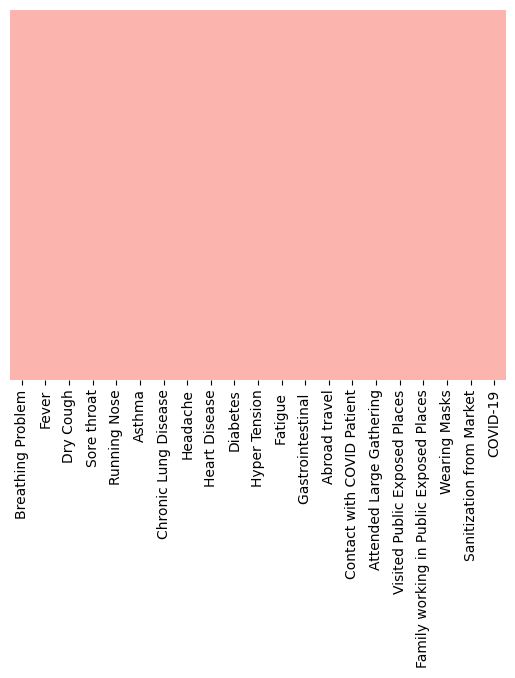

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False , cmap='Pastel1')

/tmp/ipython-input-361681640.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='COVID-19',data=df, palette="PuRd")


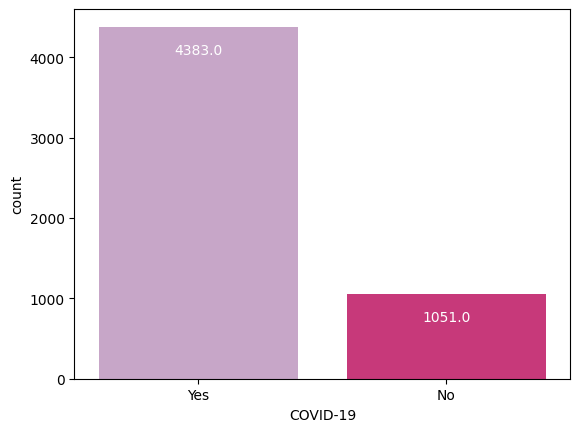

In [11]:
ax = sns.countplot(x='COVID-19',data=df, palette="PuRd")
for p in ax. patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=10)
plt.show()

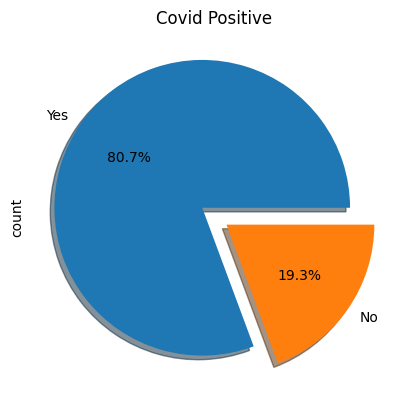

In [12]:
df["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Covid Positive');

/tmp/ipython-input-3184927629.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Breathing Problem',data=df, palette="Set1")


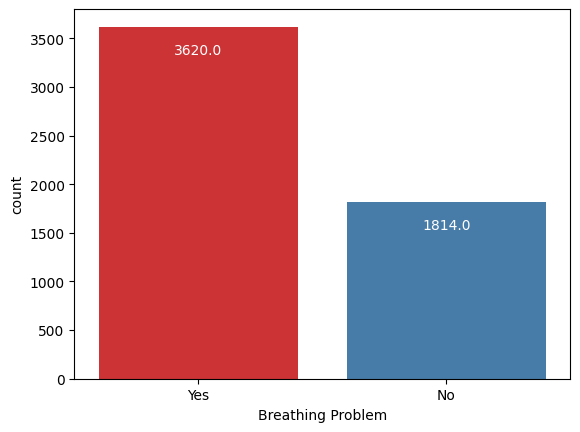

In [13]:
ax = sns.countplot(x='Breathing Problem',data=df, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=10)
plt.show()

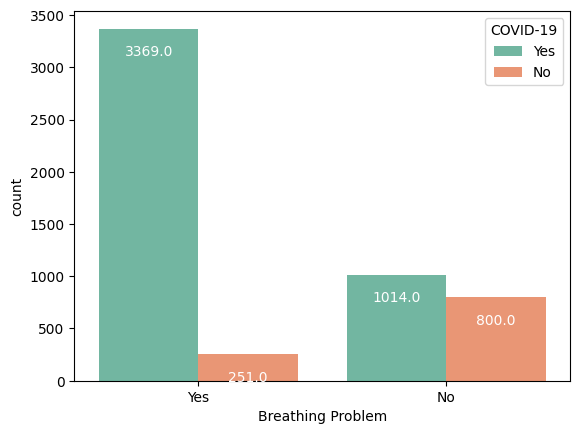

In [14]:
ax = sns.countplot(x='Breathing Problem',hue='COVID-19',data=df, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
plt.show()

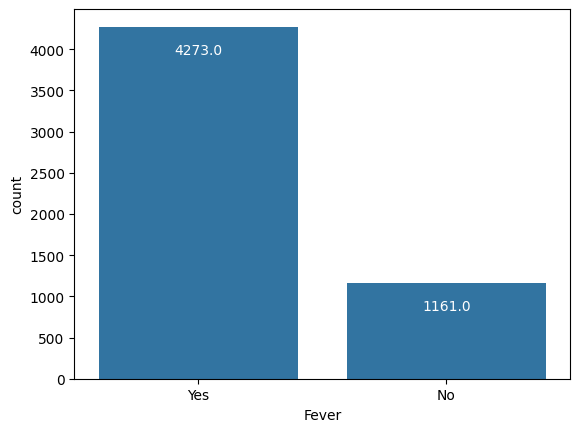

In [15]:
ax = sns.countplot(x='Fever',data=df)
for p in ax. patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=10)
plt.show()

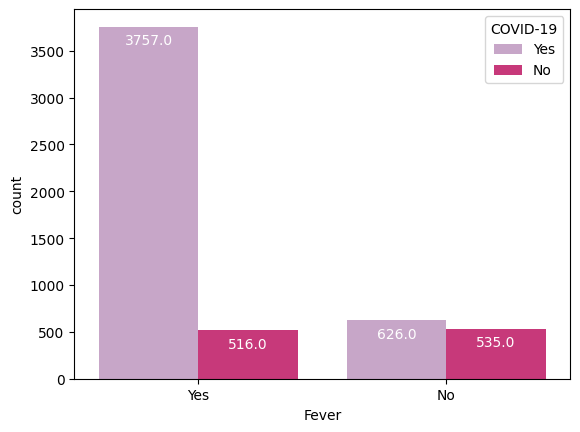

In [16]:
ax = sns.countplot(x='Fever',hue='COVID-19',data=df, palette="PuRd")
for p in ax. patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

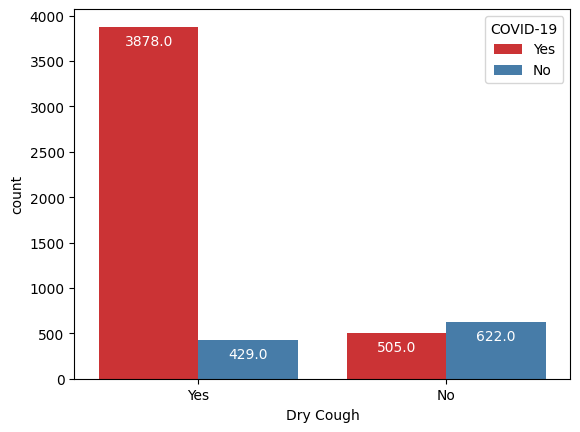

In [17]:
ax = sns.countplot(x='Dry Cough',hue='COVID-19',data=df, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

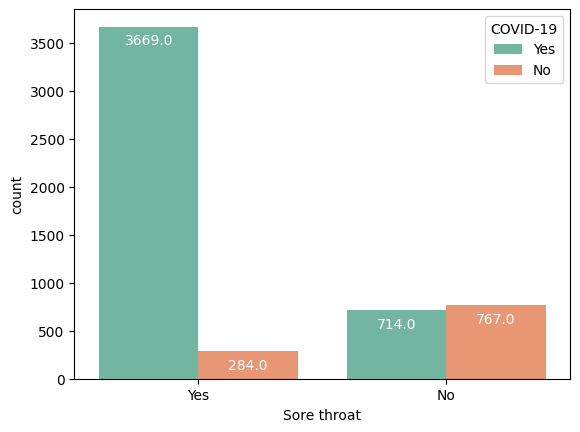

In [18]:
ax = sns.countplot(x='Sore throat',hue='COVID-19',data=df, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

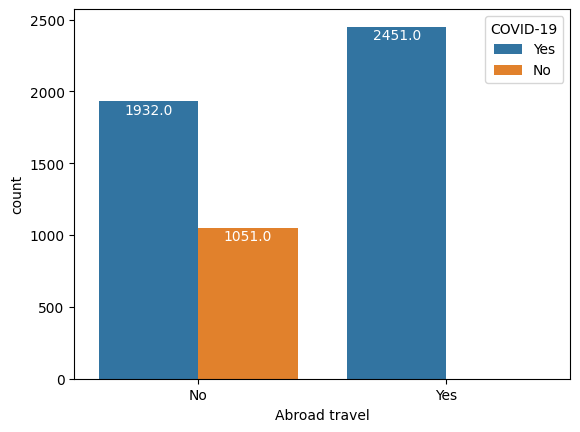

In [19]:
ax = sns.countplot(x='Abroad travel',hue='COVID-19',data=df)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

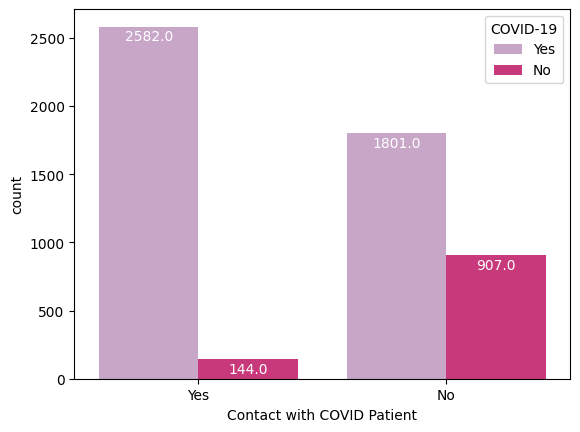

In [20]:
ax = sns.countplot(x='Contact with COVID Patient',hue='COVID-19',data=df, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

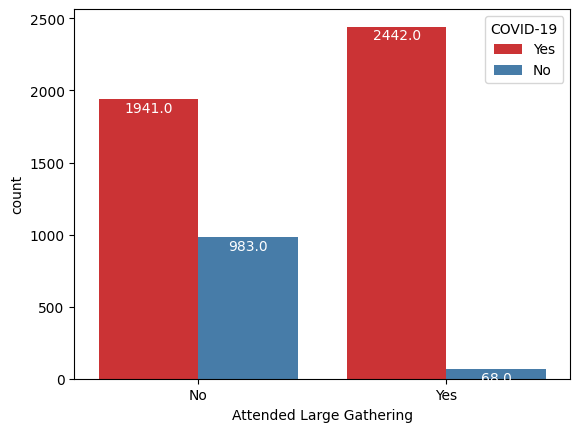

In [21]:
ax = sns.countplot(x='Attended Large Gathering',hue='COVID-19',data=df, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

In [22]:
e=LabelEncoder()

In [23]:
df['Breathing Problem']=e.fit_transform(df['Breathing Problem'])
df['Fever']=e.fit_transform(df['Fever'])
df['Dry Cough']=e.fit_transform(df['Dry Cough'])
df['Sore throat']=e.fit_transform(df['Sore throat'])
df['Running Nose']=e.fit_transform(df['Running Nose'])
df['Asthma']=e.fit_transform(df['Asthma'])
df['Chronic Lung Disease']=e.fit_transform(df['Chronic Lung Disease'])
df['Headache']=e.fit_transform(df['Headache'])
df['Heart Disease']=e.fit_transform(df['Heart Disease'])
df['Diabetes']=e.fit_transform(df['Diabetes'])
df['Hyper Tension']=e.fit_transform(df['Hyper Tension'])
df['Abroad travel']=e.fit_transform(df['Abroad travel'])
df['Contact with COVID Patient']=e.fit_transform(df['Contact with COVID Patient'])
df['Attended Large Gathering']=e.fit_transform(df['Attended Large Gathering'])
df['Visited Public Exposed Places']=e.fit_transform(df['Visited Public Exposed Places'])
df['Family working in Public Exposed Places']=e.fit_transform(df['Family working in Public Exposed Places'])
df['Wearing Masks']=e.fit_transform(df['Wearing Masks'])
df['Sanitization from Market']=e.fit_transform(df['Sanitization from Market'])
df['COVID-19']=e.fit_transform(df['COVID-19'])
df['Dry Cough']=e.fit_transform(df['Dry Cough'])
df['Sore throat']=e.fit_transform(df['Sore throat'])
df['Gastrointestinal ']=e.fit_transform(df['Gastrointestinal '])
df['Fatigue ']=e.fit_transform(df['Fatigue '])

In [24]:
df.head()

Breathing Problem  Fever  Dry Cough  Sore throat  Running Nose  Asthma  \
0                  1      1          1            1             1       0   
1                  1      1          1            1             0       1   
2                  1      1          1            1             1       1   
3                  1      1          1            0             0       1   
4                  1      1          1            1             1       0   

   Chronic Lung Disease  Headache  Heart Disease  Diabetes  ...  Fatigue   \
0                     0         0              0         1  ...         1   
1                     1         1              0         0  ...         1   
2                     1         1              0         1  ...         1   
3                     0         0              1         1  ...         0   
4                     1         1              1         1  ...         0   

   Gastrointestinal   Abroad travel  Contact with COVID Patient  \
0                  1              0                           1   
1                  0              0                           0   
2                  1              1                           0   
3                  0              1                           0   
4                  1              0                           1   

   Attended Large Gathering  Visited Public Exposed Places  \
0                         0                              1   
1                         1                              1   
2                         0                              0   
3                         1                              1   
4                         0                              1   

   Family working in Public Exposed Places  Wearing Masks  \
0                                        1              0   
1                                        0              0   
2                                        0              0   
3                                        0              0   
4                                        0              0   

   Sanitization from Market  COVID-19  
0                         0         1  
1                         0         1  
2                         0         1  
3                         0         1  
4                         0         1  

[5 rows x 21 columns]

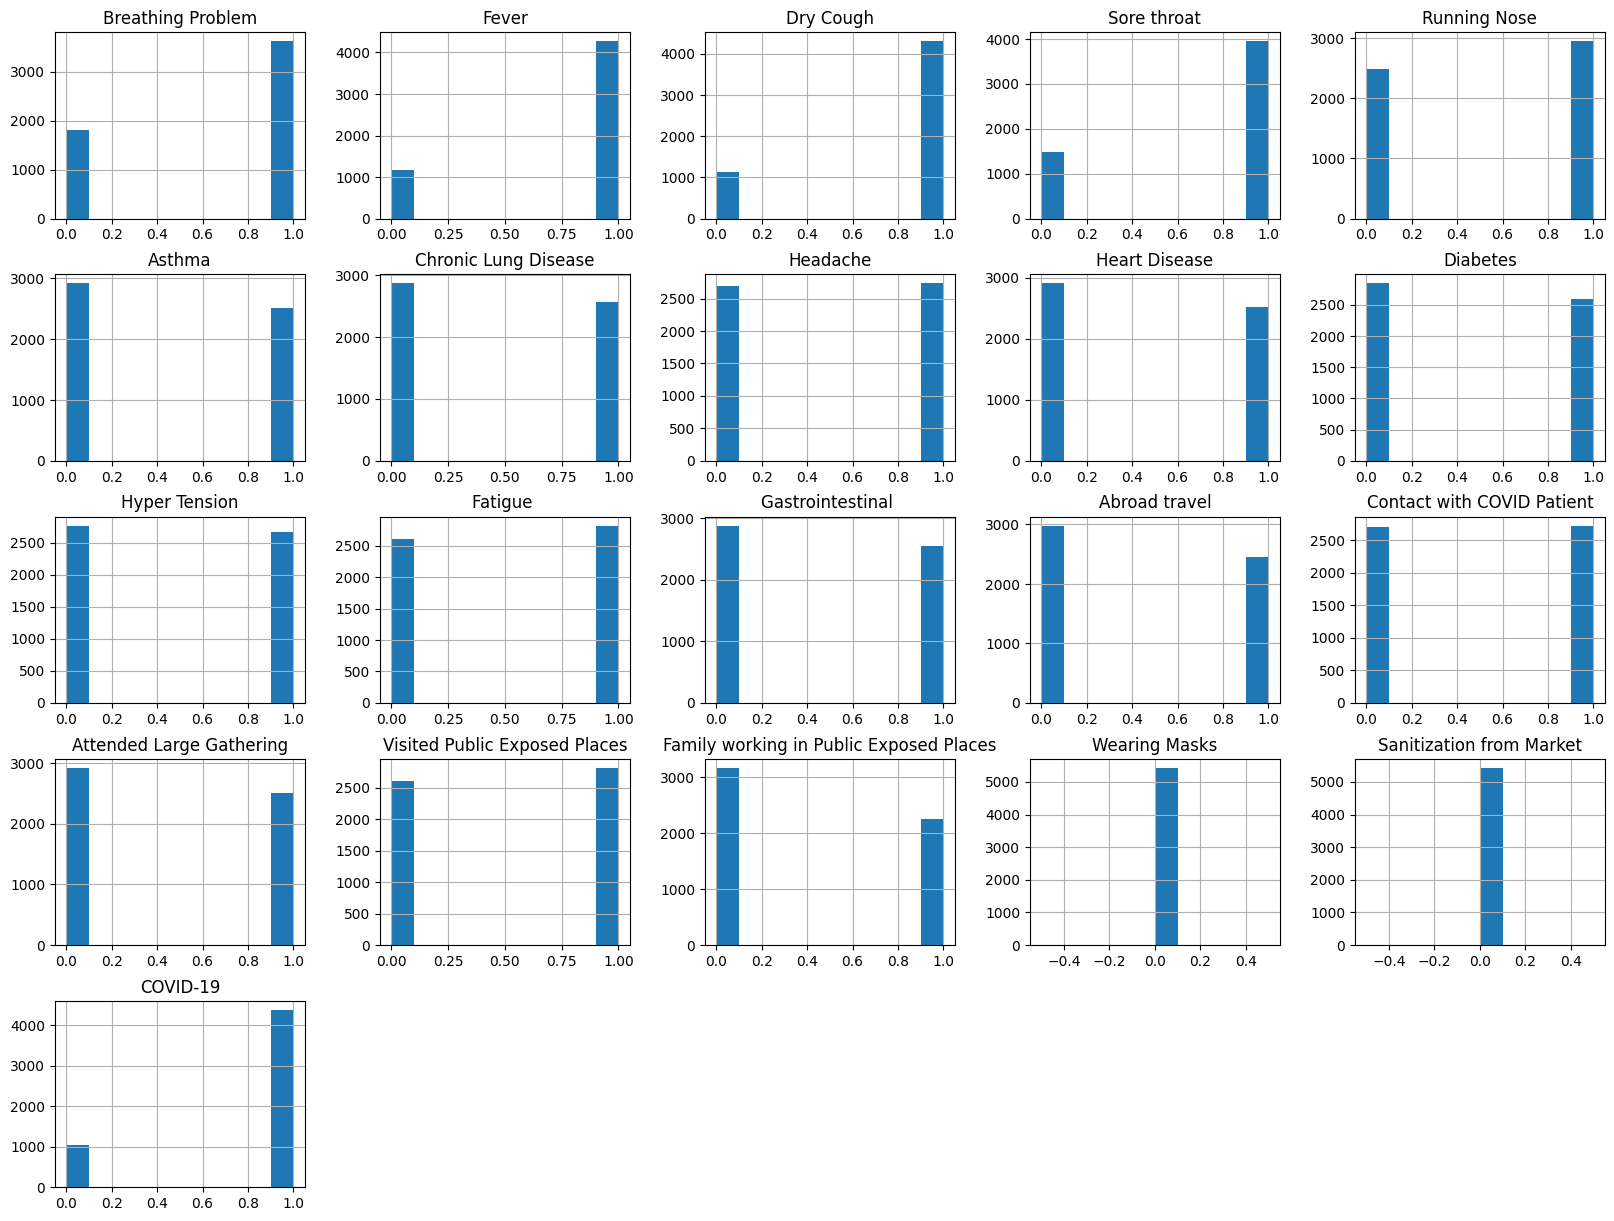

In [25]:
df.hist(figsize=(20,15));

Wearing Masks
0    5434
Name: count, dtype: int64


<Axes: xlabel='Wearing Masks', ylabel='count'>

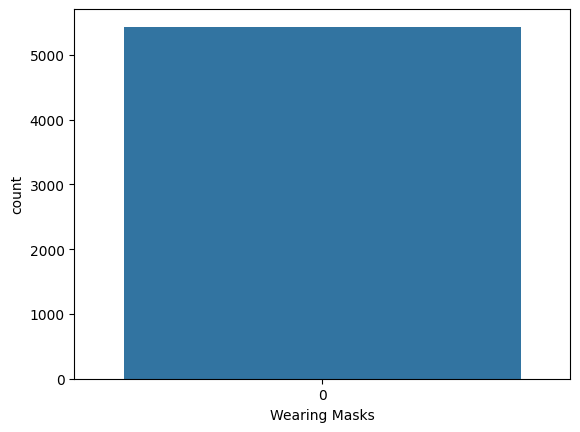

In [26]:
print(df['Wearing Masks'].value_counts())
sns.countplot(x='Wearing Masks',data=df)
#this code can be useful for visualizing the frequency of different values in the "Wearing Masks" column of the COVID-19 dataset.

Sanitization from Market
0    5434
Name: count, dtype: int64


<Axes: xlabel='Sanitization from Market', ylabel='count'>

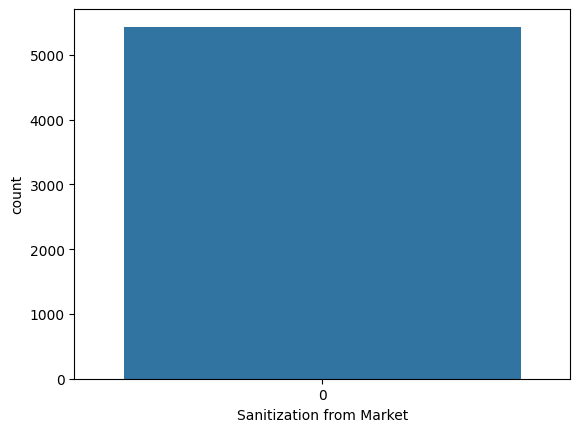

In [27]:
print(df['Sanitization from Market'].value_counts())
sns.countplot(x='Sanitization from Market',data=df)

In [28]:
df=df.drop('Wearing Masks',axis=1)
df=df.drop('Sanitization from Market',axis=1)

In [29]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')

<Axes: >

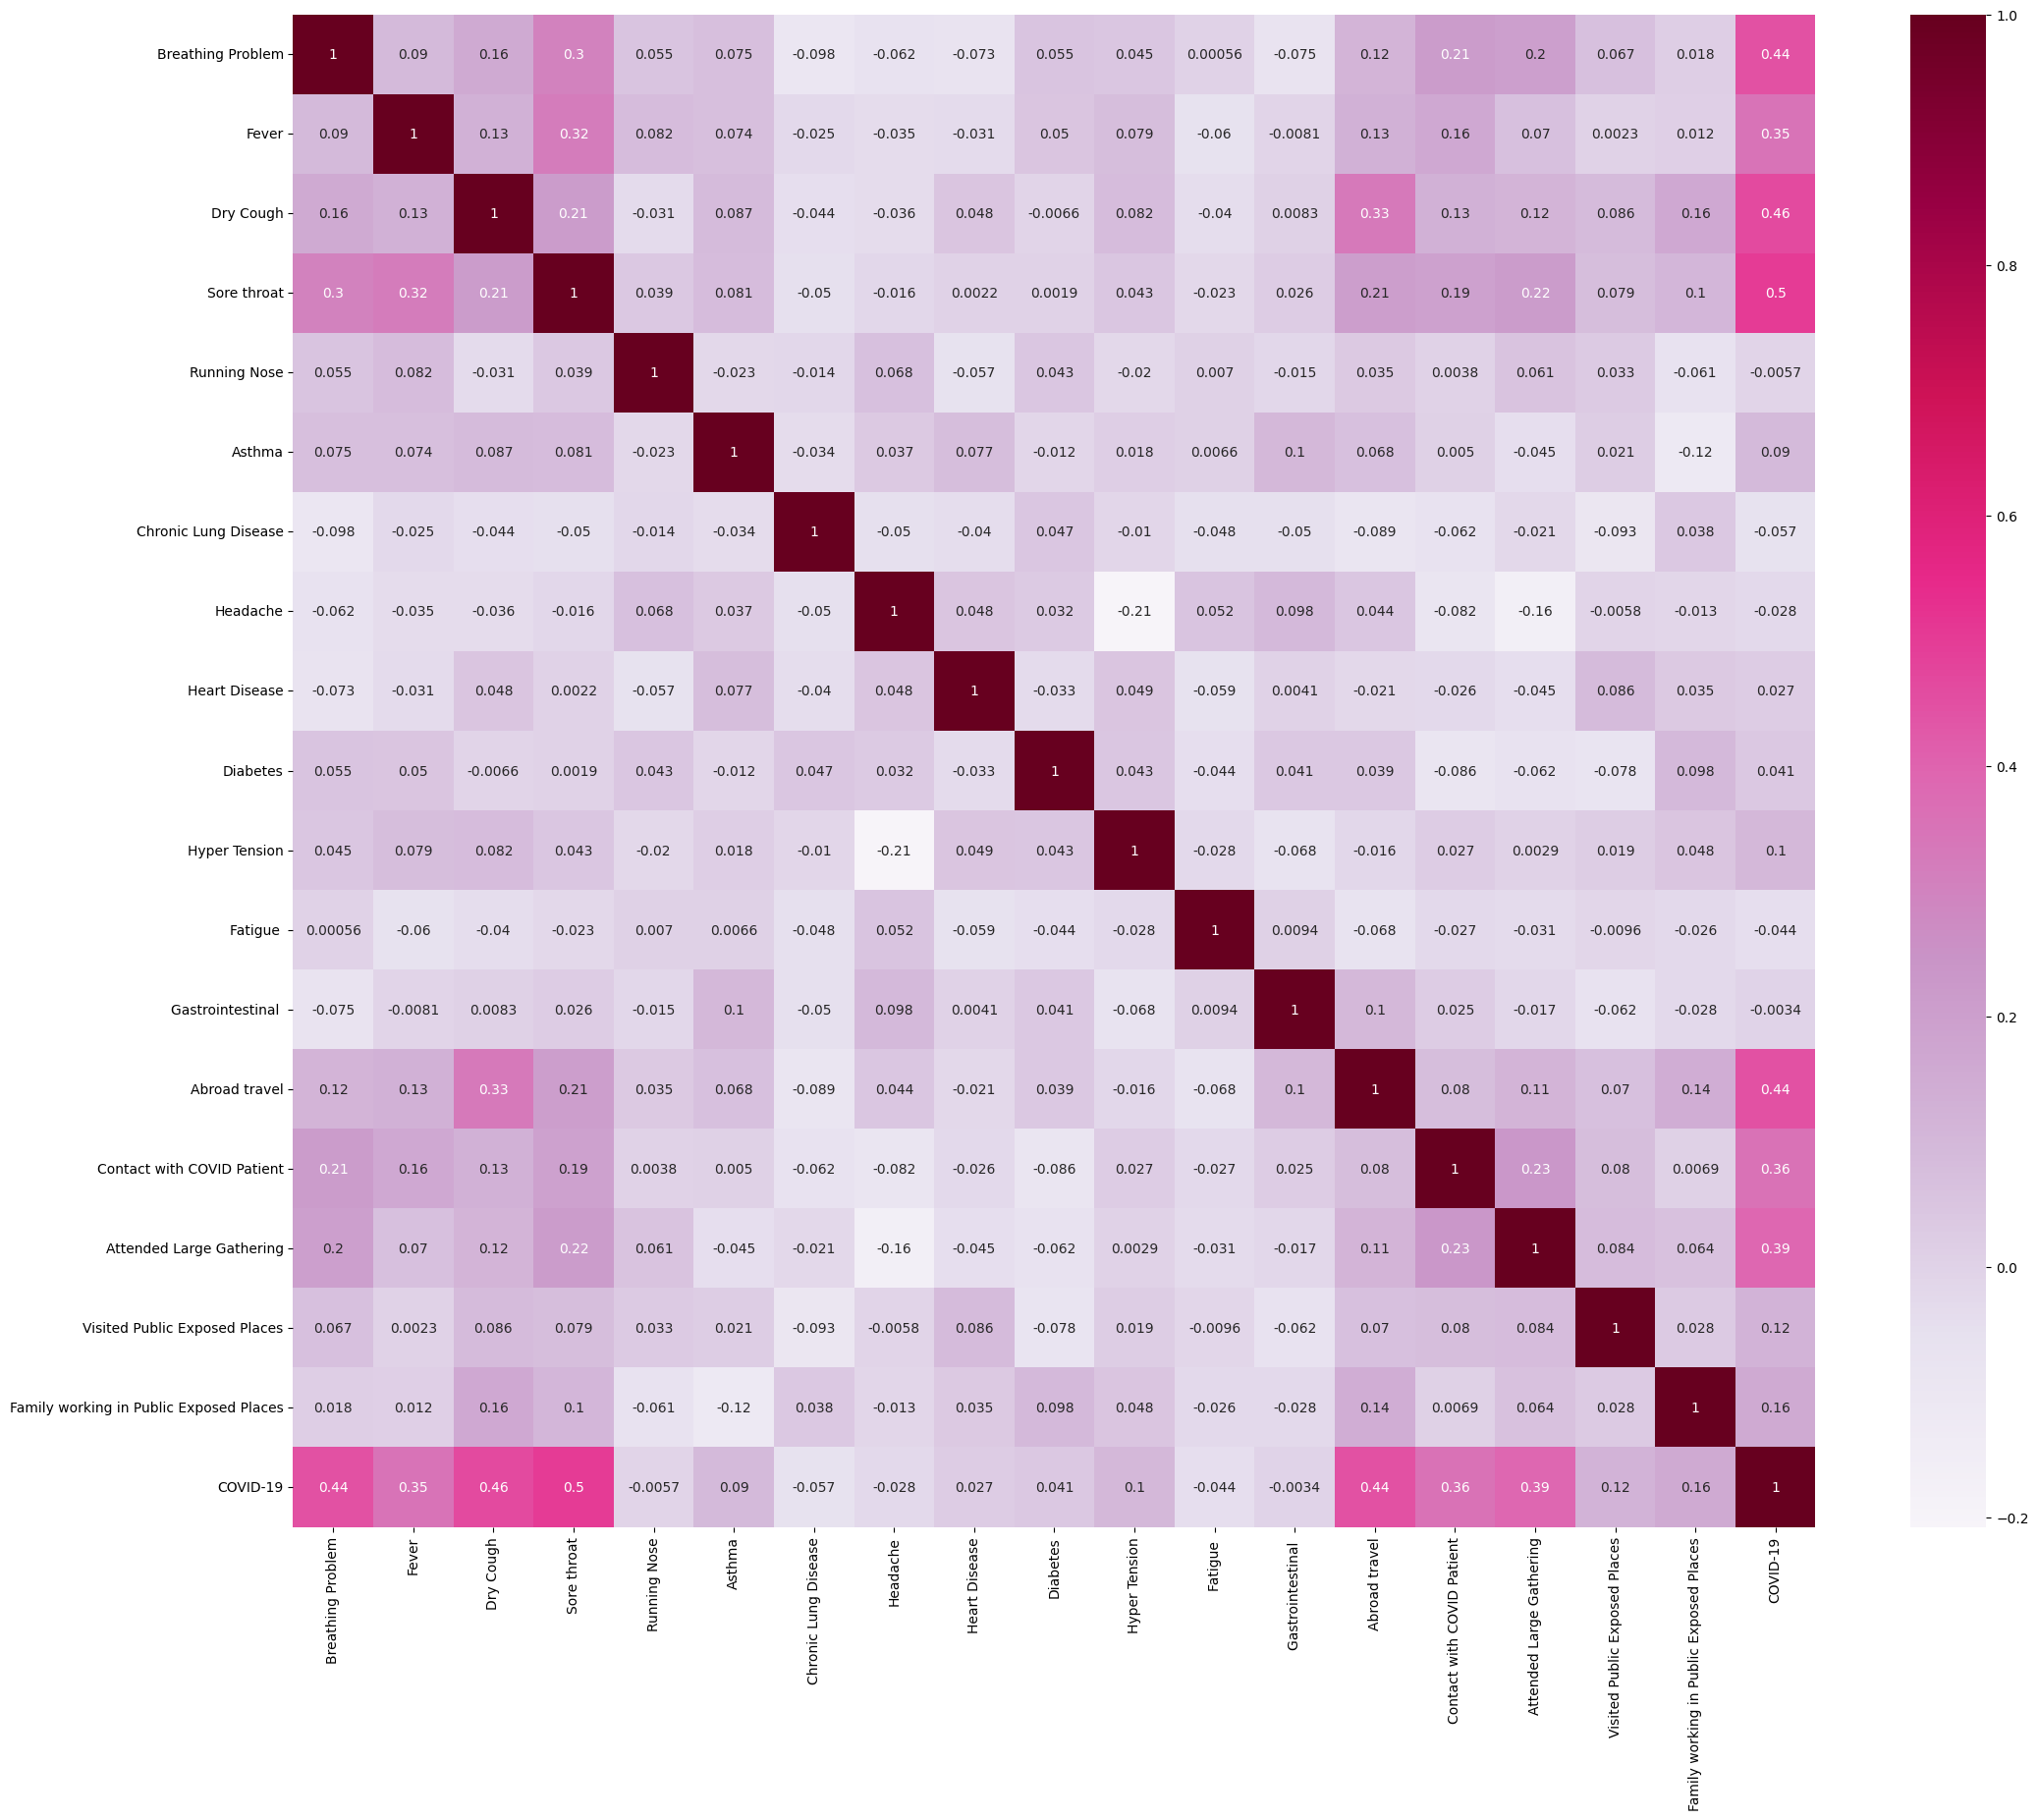

In [30]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, cmap="PuRd")
# this code can be useful for visualizing the correlation between different features of the COVID-19 dataset.